# 이동 평균과 이동 표준 편차를 사용한 이상치 탐지 실습

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows', 500)

# 시계열 데이터 생성 
dataes = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dataes, 
    'Value' : values
})

### 이동 평균과 이동 표준편차 계산 

In [3]:
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()

print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.252244
7      0.002684
8     -0.326005
9     -0.493277
10    -0.838656
11    -0.336100
12    -0.016148
13     0.100251
14     0.221707
15     0.466124
16     0.510727
17     0.761748
18     0.424542
19     0.207479
20     0.228560
21     0.293974
22     0.228265
23     0.141540
24     0.247467
25     0.137084
26     0.358945
27    -0.076692
28    -0.215365
29    -0.378153
30    -0.196029
31    -0.347247
32    -0.273660
33    -0.573476
34    -0.355812
35    -0.069963
36    -0.172169
37    -0.320600
38    -0.127880
39    -0.208172
40     0.074365
41     0.103227
42    -0.432446
43    -0.196319
44    -0.061359
45     0.008147
46     0.178560
47     0.202112
48     0.332413
49     0.647780
50     0.707657
51     0.616081
52     0.106419
53     0.030123
54    -0.291155
55    -0.431368
56    -0.319134
57    -0.573903
58    -0.600137
59    -0.534068
60    -0.566372
61    -0.097345
62    -0

#### 임계값 설정, 이상치 탐지 

In [4]:
threahold_multiplier = 2 # 임계값 계수 
data['Threshold'] = data['MovingAverage'] + threahold_multiplier * data['MovingStd']

# print(data['Threahold'])

# 이상치 탐지 -> 임계값을 초과 하는 경우는 True(이상치)로 설정합니다. 
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

### 시각화

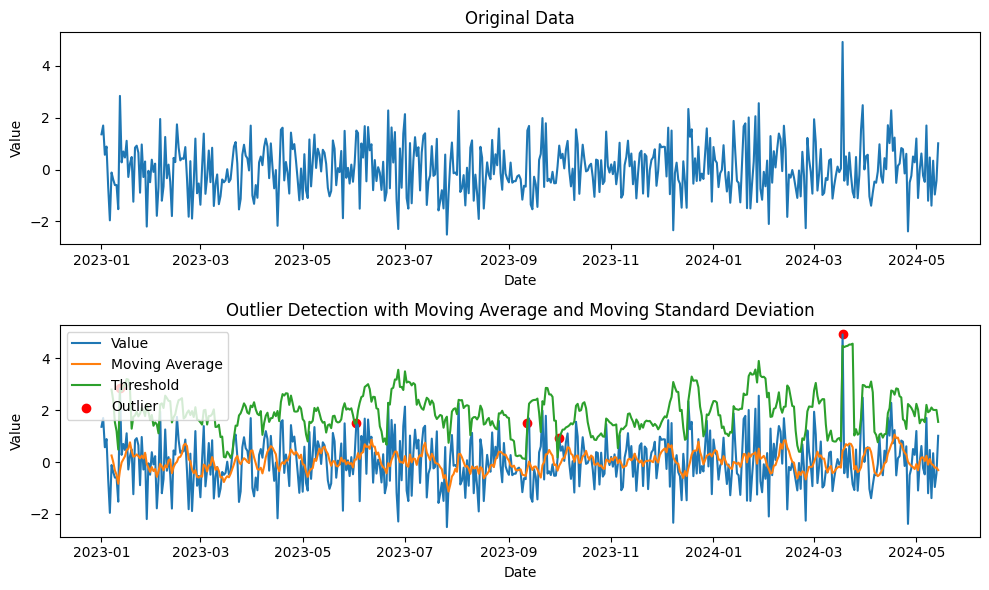

In [5]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

plt.tight_layout()

plt.show()